In [1]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import json
import nltk

%matplotlib inline

In [2]:
path_to_data = './data'

# create dataframe from sessions.json
df = pd.read_json(f'{path_to_data}/sessions/sessions_04_30.json')
df.head()

# create dictionaries for switching between symptom and id
id2sym = {}
sym2id = {}

# create dictionary containing all relevant information of the symptoms
sym_info = {}

with open(f'{path_to_data}/symptoms/symptoms_04_30.json') as json_file:
    data = json.load(json_file)
    for sym in data:
        id2sym[sym['id']] = sym['name']
        sym2id[sym['name']] = sym['id']
        
        sym_info[sym['name']] = sym

print(f'Numer of symptoms in id2sym: {len(sym2id)}')

if False:
    # remove labels that have less than m occurrences
    m = 100

    labels_list = df['all_confirmed'].tolist()
    labels_list = sum(labels_list, [])
    c = Counter(labels_list)
    for i in range(len(df)):
        to_remove = []
        
        # find labels that should be removed 
        for j in range(len(df['all_confirmed'][i])):
            if c[df['all_confirmed'][i][j]] < m:
                to_remove.append(j)
                
        # remove the labels
        shift = 0
        for j in range(len(to_remove)):
            df['all_confirmed'][i].pop(to_remove[j]-shift)
            shift += 1

# column that should be used as labels
label_col = 'confirmed'
        
# add column with the symptom names
sym_names = []

for syms in df[label_col]:
    if len(syms) != 0:
        sym_names.append([id2sym[x] for x in syms])
    else:
        sym_names.append([])

df['labels'] = sym_names

# turn suggested column into symptom names
sym_names = []

for syms in df['suggested']:
    if len(syms) != 0:
        sym_names.append([id2sym[x] for x in syms if x in id2sym])
    else:
        sym_names.append([])

df['suggested'] = sym_names
    

# remove all rows with no confirmed labels
#df = df[df[label_col].map(len) > 0]
#df = df.reset_index(drop=True)

# remove unused columns
df.drop('confirmed', inplace=True, axis=1)
df.drop('all_confirmed', inplace=True, axis=1)
#df.drop('suggested', inplace=True, axis=1)

Numer of symptoms in id2sym: 530


In [3]:
df.head()

,text,sex,age,suggested,labels
0,Jag har hostat snart 3 veckor. Snorar fram och...,Kvinna,37.0,"[Snuva, Hosta]","[Snuva, Hosta]"
1,Ångest,Man,39.0,[Oro eller ångest],[]
2,Brännskada\n\n,Kvinna,48.0,[],[]
3,H,Kvinna,30.0,[],[Hosta]
4,Svår smärta i vänsterhanden/handleden precis n...,Kvinna,32.0,"[Halsont, Tryckrelaterad bröstsmärta, Buksmärt...","[Smärta i handled eller fingrar, Förvärras av ..."


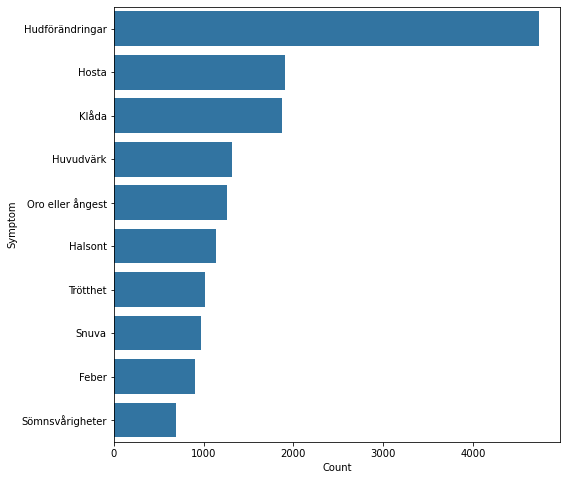

In [27]:
# plot the distribution of labels
all_syms = sum(df['labels'].tolist(),[])
all_syms = nltk.FreqDist(all_syms)

all_syms_df = pd.DataFrame({'Symptom': list(all_syms.keys()),
                            'Count': list(all_syms.values())
                           })

g = all_syms_df.nlargest(columns='Count', n=10)
plt.figure(figsize=(8,8))
#plt.figure()
ax = sns.barplot(data=g, x='Count', y='Symptom', color='C0')
plt.savefig(fname=r'C:\Users\alexa\Desktop\thesis_pics\label_counts.eps', format='eps', bbox_inches='tight')
plt.show()

2:	 18.960 %
0:	 16.667 %
1:	 49.518 %
6:	 0.601 %
3:	 8.386 %
4:	 3.872 %
5:	 1.587 %
7:	 0.261 %
10:	 0.023 %
8:	 0.078 %
9:	 0.032 %
12:	 0.009 %
11:	 0.005 %


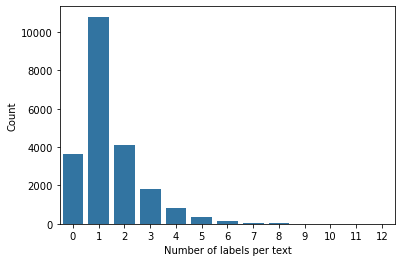

In [5]:
# plot the distribution of number of labels per sample
count_list = []

for sym_list in df['labels']:
    count_list.append(f'{len(sym_list)}')
    
count_dict = nltk.FreqDist(count_list)
count_dict_df = pd.DataFrame({'Number of labels per text': list(count_dict.keys()),
                              'Count': list(count_dict.values())
                             })

# print percentages
count_dict_df = count_dict_df.sort_values(by=['Count'])
tot_samples = sum(count_dict_df['Count'].tolist())
for i in range(len(count_dict_df)):
    print(f'{count_dict_df["Number of labels per text"][i]}:\t {count_dict_df["Count"][i] / tot_samples * 100:.3f} %')

g = count_dict_df.nlargest(columns='Count', n=60)



#plt.figure(figsize=(8,6))
plt.figure()
order = [f'{i}' for i in range(0,13)]
ax = sns.barplot(data=g, y='Count', x='Number of labels per text', color='C0', order=order)
plt.savefig(fname=r'C:\Users\alexa\Desktop\thesis_pics\labels_per_text.eps', format='eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

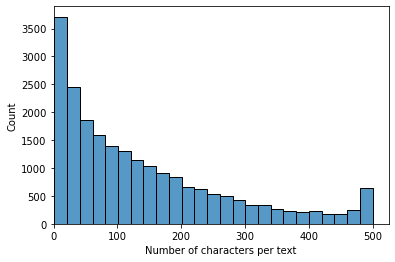

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

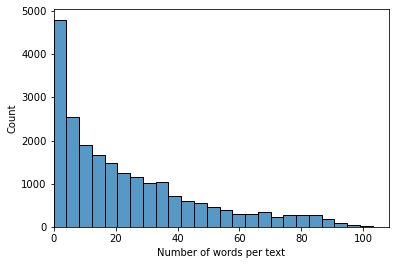

In [6]:
def clean_text(text):
    # turn text to lowercase
    text = text.lower()
    
    # remove all characters that are not letters or whitespace
    text = re.sub(r'[^\p{L} ]', '', text)
    
    return text

# plot the distribution of text lengths
length_list = []

for text in df['text']:
    length_list.append(len(text))

length_list_df = pd.DataFrame({'Number of characters per text': length_list})

ax = sns.histplot(data=length_list_df, x='Number of characters per text', bins=25)
ax.set(xlim=(0,None))
plt.savefig(fname=r'C:\Users\alexa\Desktop\thesis_pics\char_hist.eps', format='eps', bbox_inches='tight')
plt.show()

# plot the distribution of words per text
word_count_list = []

for text in df['text']:
    text = clean_text(text)
    word_count_list.append(len(text.split()))
    
word_count_df = pd.DataFrame({'Number of words per text': word_count_list})

ax = sns.histplot(data=word_count_df, x='Number of words per text', bins=25)
#ax.set(ylabel='Text count')
ax.set(xlim=(0,None))
plt.savefig(fname=r'C:\Users\alexa\Desktop\thesis_pics\word_hist.eps', format='eps', bbox_inches='tight')

plt.show()

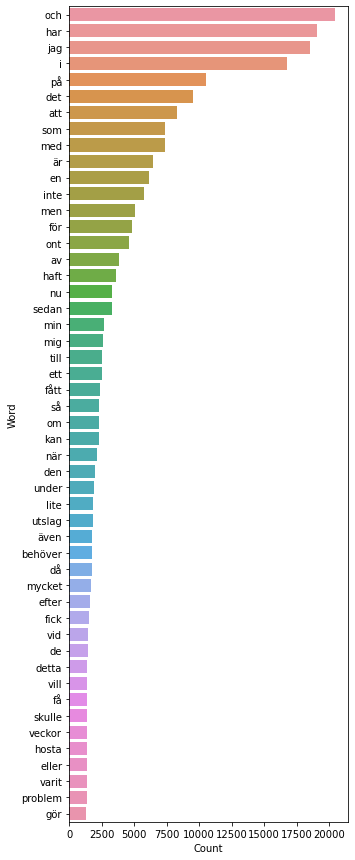

In [7]:
# plot the distribution of words
words = df['text'].tolist()
all_words = [clean_text(x).split() for x in words]
all_words = sum(all_words,[])
all_words = nltk.FreqDist(all_words)

all_words_df = pd.DataFrame({'Word': list(all_words.keys()),
                            'Count': list(all_words.values())
                           })

g = all_words_df.nlargest(columns='Count', n=50)
plt.figure(figsize=(5,15))
ax = sns.barplot(data=g, x='Count', y='Word')

In [8]:
# further explore the distribution of labels
labels = df['labels'].tolist()

multilab_bin = MultiLabelBinarizer()
y = multilab_bin.fit_transform(labels)

label_counts = np.sum(y, axis=0)
label_counts = np.flip(np.sort(label_counts))
print('Number of occurrences per label:')
print(label_counts)

n = 20
accum_per = np.sum([label_counts[:n]]) / np.sum(label_counts) * 100
print(f'The {n} most common labels make up {accum_per:.2f} % of all label occurrences')

m = 5
below_m = label_counts[label_counts < m]
print(f'{len(below_m)}/{len(label_counts)} labels have less than {m} occurrences')

Number of occurrences per label:
[4733 1903 1877 1312 1258 1144 1015  976  908  691  666  639  592  586
  463  441  425  411  402  385  377  336  331  292  268  263  256  241
  224  224  213  191  190  189  183  182  165  155  153  147  142  141
  140  138  134  131  127  127  126  124  124  121  111  111  102   97
   80   80   75   73   73   72   69   67   66   63   61   56   56   53
   52   51   51   51   50   50   49   48   48   47   47   46   46   45
   43   40   39   39   39   39   38   35   34   34   34   34   34   33
   33   32   32   31   31   31   30   30   29   29   28   27   27   26
   26   26   24   24   23   23   22   22   21   21   21   21   20   18
   18   17   17   17   17   16   16   16   15   15   15   15   15   14
   14   14   13   13   13   12   11   11   11   10   10   10   10   10
   10   10   10    9    9    9    9    9    9    8    8    8    8    8
    8    8    8    8    7    7    7    7    7    7    6    6    6    6
    6    6    6    6    6    6    6    6    

In [ ]:
# find duplicates in dataset
dup_count = 0
dup_text_count = {}

# get dict with symptom to counts
sym_counts = {}
for i in range(len(all_syms_df)):
    sym_counts[all_syms_df['Symptom'][i]] = all_syms_df['Count'][i]

check_set = set()

for i in range(len(df)):
    if df['labels'][i] == []:
        continue
    
    if (df['text'][i], tuple(df['labels'][i])) in check_set: 
        if df['labels'][i] != []:#: and len(df['text'][i]) > 50:
            #print(f'{df["text"][i]}\n{df["labels"][i]}')#'\n({check_dict[df["text"][i]][0]},{i})')
            #for j in range(len(df['labels'][i])):
            #    print(f"{df['labels'][i][j]}: {sym_counts[df['labels'][i][j]]}")
            #print()
            dup_count += 1
            
            if df['text'][i] in dup_text_count:
                dup_text_count[df['text'][i]] += 1
            else:
                dup_text_count[df['text'][i]] = 1
    else:
        check_set.add((df['text'][i], tuple(df['labels'][i])))
        
print(dup_count)

# print duplicates and their respective number of occurrences
for key, val in dup_text_count.items():
    print(f'{key}\n{val}\n')

In [ ]:
# observe potential connections between age and symptom

# dictionary containing lists of ages for each symptom
sym2info = {}

all_info = {'age': [], 'gen': []}

for i in range(len(df)):
    age = df['age'][i]
    gen = df['sex'][i]
    
    for sym in df['labels'][i]:
        if sym in sym2info:
            sym2info[sym]['age'].append(age)
            sym2info[sym]['gen'].append(gen)
        else:
            sym2info[sym] = {'age': [age], 'gen': [gen]}
            
    all_info['age'].append(age)
    all_info['gen'].append(gen)
    
    if age > 1000:
        print(age)
    
#print(np.mean(sym2info['Hosta']['age']))
    
palette ={"Kvinna": "C0", "Man": "C1", "Annat": "C2"}
order = ['Kvinna', 'Man', 'Annat']

plt.figure()
plt.subplot(1,2,1)
ax = sns.histplot(data=all_info, x='age', bins=25)
ax.set_xlabel('Age')
ax.set_title('All symptoms')

plt.subplot(1,2,2)
ax = sns.countplot(data=all_info, x='gen', palette=palette, order=order)

plt.show()
    
# symptom to observe
sym = 'Hosta'

zipped = [(multilab_bin.classes_[i], label_counts[i]) for i in range(len(multilab_bin.classes_))]
zipped = sorted(zipped, key=lambda tup: tup[1], reverse=True)


for i in range(len(zipped)):
    sym = zipped[i][0]
    
    plt.figure()
    plt.subplot(1,2,1)
    ax = sns.histplot(data=sym2info[sym], x='age', bins=25)
    ax.set_xlabel('Age')
    ax.set_title(sym)
    
    plt.subplot(1,2,2)
    ax = sns.countplot(data=sym2info[sym], x='gen', palette=palette, order=order)
    plt.show()

In [ ]:
# compute correlation matrix for the labels

from string import ascii_letters

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# create dataframe containing the labels
lab_df = pd.DataFrame(y)
lab_df.columns = multilab_bin.classes_

# compute the correlation matrix
corr = lab_df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11,9))
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink': .5})


corr = corr.abs()
s = corr.unstack()
so = s.sort_values(kind='quicksort')
#so = so[:-(len(multilab_bin.classes_))]

# set to keep track of what has been printed
printed_set = set()

for i in range(len(so)):
    # iterate backwards
    idx = len(so)-1-i
    
    sym1,sym2 = so.index[idx]
    
    if sym1 != sym2 and (sym1, sym2) not in printed_set:
        print(f"\'{sym1}\', \'{sym2}\': {so[idx]}")
        
        printed_set.add((sym1,sym2))
        printed_set.add((sym2,sym1))

for sym in multilab_bin.classes_:
    max_val = max(lab_df[sym])
    #rint(max_val)

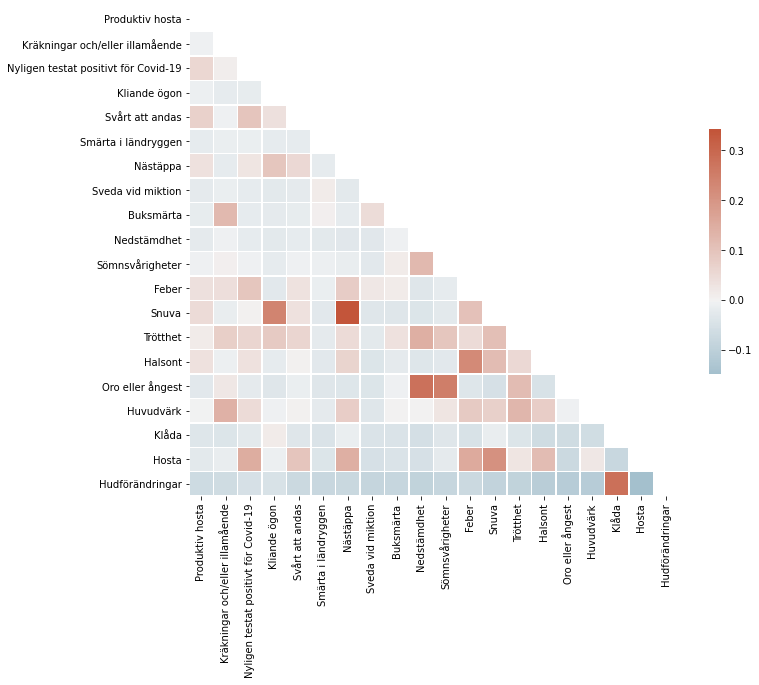

In [28]:
# create correlation matrix with chosen symptoms
#chosen_syms = ['Synliga hudbesvär', 'Hudbesvär', 'Feber', 'Snuva', 'Nästäppa', 'Huvudvärk', 'Hosta', 'Blodig hosta', 'Förstorad tunga']

# get the list of the n most common symptoms
n = 20

label_counts = np.sum(y, axis=0)
zipped = [(multilab_bin.classes_[i], label_counts[i]) for i in range(len(multilab_bin.classes_))]
zipped = sorted(zipped, key=lambda tup: tup[1])

chosen_syms = [tup[0] for tup in zipped[-n:]]

temp_labels = np.zeros((len(y),1))

for sym in chosen_syms:
    
    # variable to check if the symptom was found
    cur_len = temp_labels.shape[1]
    
    for i in range(len(multilab_bin.classes_)):
        if multilab_bin.classes_[i] == sym:
            temp_labels = np.concatenate((temp_labels, y[:,i].reshape(-1,1)), axis=1)
            break
    
    # check if the symptom was found
    if cur_len == temp_labels.shape[1]:
        print(f'Unable to find symptom: {sym}')
        
# remove the first column which is only zeros
temp_labels = temp_labels[:,1:]

if temp_labels.shape[1] != len(chosen_syms):
    print('Dimensions do not match number of symptoms')
            
# create dataframe containing the labels
lab_df = pd.DataFrame(temp_labels)
lab_df.columns = chosen_syms

# compute the correlation matrix
corr = lab_df.corr()

# only use absolute value of correlations
#corr = corr.abs()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11,9))
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink': .5})

plt.savefig(fname=r'C:\Users\alexa\Desktop\thesis_pics\corr_mat.eps', format='eps', bbox_inches='tight')


In [13]:
# find counts of symptoms
syms = ['Blodig hosta', 'Förstorad tunga', 'Minnessvårigheter', 'Likgiltighet']

for i in range(len(multilab_bin.classes_)):
    if multilab_bin.classes_[i] in syms:
        print(f'{multilab_bin.classes_[i]}: {label_counts[i]}')

Blodig hosta: 14
Förstorad tunga: 2
Likgiltighet: 7
Minnessvårigheter: 30


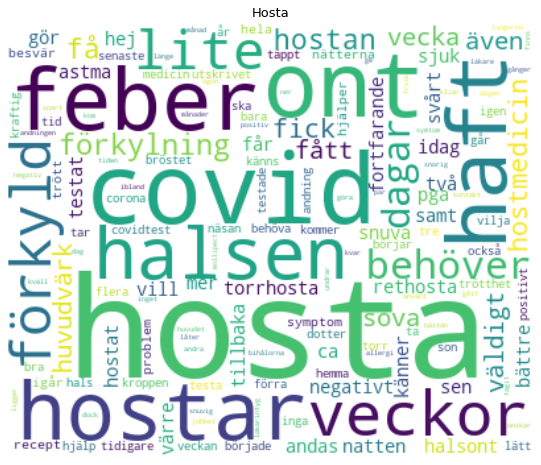

In [30]:
# create a WordCloud representation

# manually found stop-words
#stop_words = ['jag', 'har', 'med', 'och', 'att', 'på', 'men',
#             'är', 'som', 'det', 'inte', '']

stop_words = set(nltk.corpus.stopwords.words('swedish'))
#stop_words = []

# create new dataframe containing symptoms and texts that they occur in 
symtexts = []

for i in range(len(df)):
    text = clean_text(df['text'][i])
    
    # remove stop-words
    words = text.split()
    new_text = ''
    for w in words:
        if w not in stop_words:
            new_text += w + ' '
    text = new_text
    
    for sym in df['labels'][i]:
        symtexts.append([sym, text])
        
st_df = pd.DataFrame(symtexts, columns=['symptom', 'text'])

# make one row per symptom with all texts concatenated
st_df = st_df[['symptom', 'text']].groupby(by='symptom').agg(lambda x: ' '.join(x))

# create a Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,1), analyzer='word')
data = cv.fit_transform(st_df['text'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = st_df.index
#df_dtm.head(3)


from wordcloud import WordCloud
from textwrap import wrap

# function for generating word clouds
def generate_wordcloud(data, title):
    wc = WordCloud(background_color='white', width=400, height=330, max_words=150).generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.savefig(fname=r'C:\Users\alexa\Desktop\thesis_pics\wc_hosta.eps', format='eps', bbox_inches='tight')
    plt.show()
    
# transposing document term matrix
df_dtm = df_dtm.transpose()

# plot word cloud
sym = 'Hosta'
generate_wordcloud(df_dtm[sym].sort_values(ascending=False), sym)

In [ ]:
# experiment with multilearn train_test_split for a more balanced split
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.dataset import load_dataset
from sklearn.model_selection import train_test_split

#X = df
X = np.array([i for i in range(len(df))]).reshape(-1,1)
y = multilab_bin.transform(df['labels'].tolist())

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y,
                                                            test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=rs,
#                                                     test_size=0.2)

print(X_train.shape)
print(X_test.shape)
    
X_train = X_train.reshape(-1).tolist()
X_test = X_test.reshape(-1).tolist()

df_train = df.iloc[X_train]
df_test = df.iloc[X_test]

#print(X_test[:200])

labels_train = np.array(multilab_bin.transform(df_train['labels']))
labels_test = np.array(multilab_bin.transform(df_test['labels']))



label_counts_train = np.sum(labels_train, axis=0)
label_counts_test = np.sum(labels_test, axis=0)

#print(label_counts_train)
#print(label_counts_test)

for i in range(label_counts.shape[0]):
    lc_train = label_counts_train[i]
    lc_test = label_counts_test[i]
    print(f'{lc_train}, {lc_test} ({lc_test/(lc_train+lc_test)*100:.2f})')
    

(0.0, 1.0)

<Figure size 432x288 with 0 Axes>

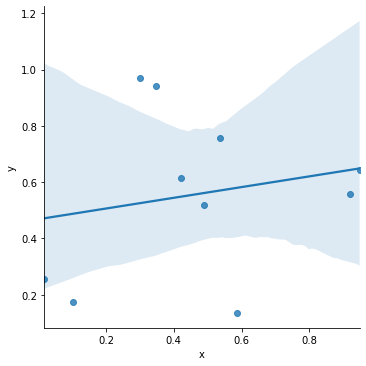

In [16]:
# test out the regression of
data = {
    'x': np.random.default_rng().uniform(low=0, high=1.0, size=(10,)).tolist(),
    'y': np.random.default_rng().uniform(low=0, high=1.0, size=(10,)).tolist()
}
temp_df = pd.DataFrame(data)
temp_df

plt.figure()
g = sns.lmplot(
        data=temp_df,
        x='x', y='y',
        #height=5,
        order=1,
    )
ax.set_ylim((0,1))